# 1) EDA

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("data/titanic/train.csv")

In [6]:
print(train.shape)
train.head(2)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### 1-1 결측치 확인

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age와 Cabin,Embarked에 결측치가 보인다. 

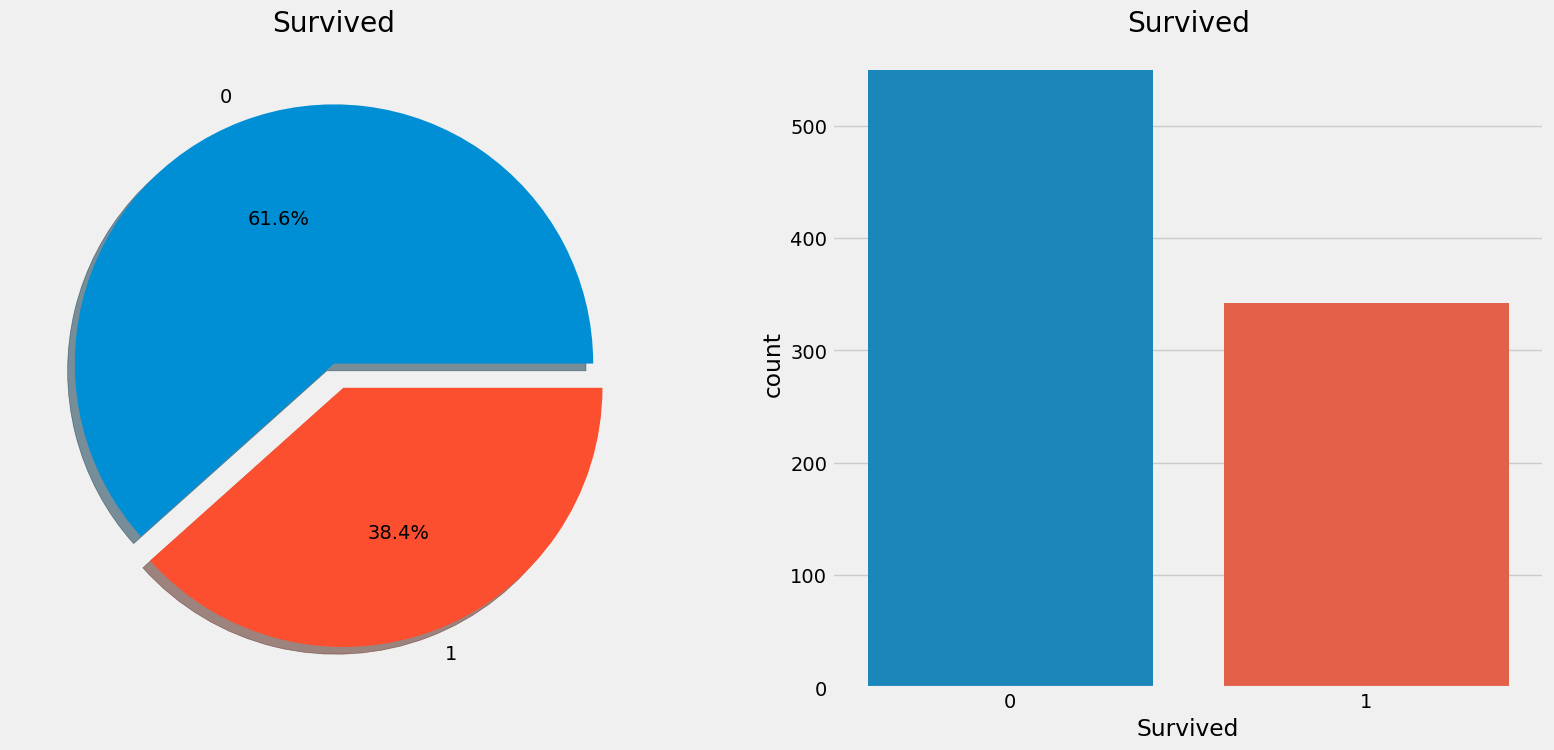

In [15]:
# 생존비율 확인
f, ax = plt.subplots(1,2, figsize = (18,8))
train["Survived"].value_counts().plot.pie(explode = [0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data = train, ax = ax[1])
ax[1].set_title("Survived")
plt.show()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Categorical Features: Sex,Embarked.
* Ordinal Features: PClass
* Continous Feature:Age

#### 1-2 Features 분석

### Sex

In [17]:
# Sex--> Categorical Feature
# 성별과 생존을 기준으로 생존자 수 확인
train.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

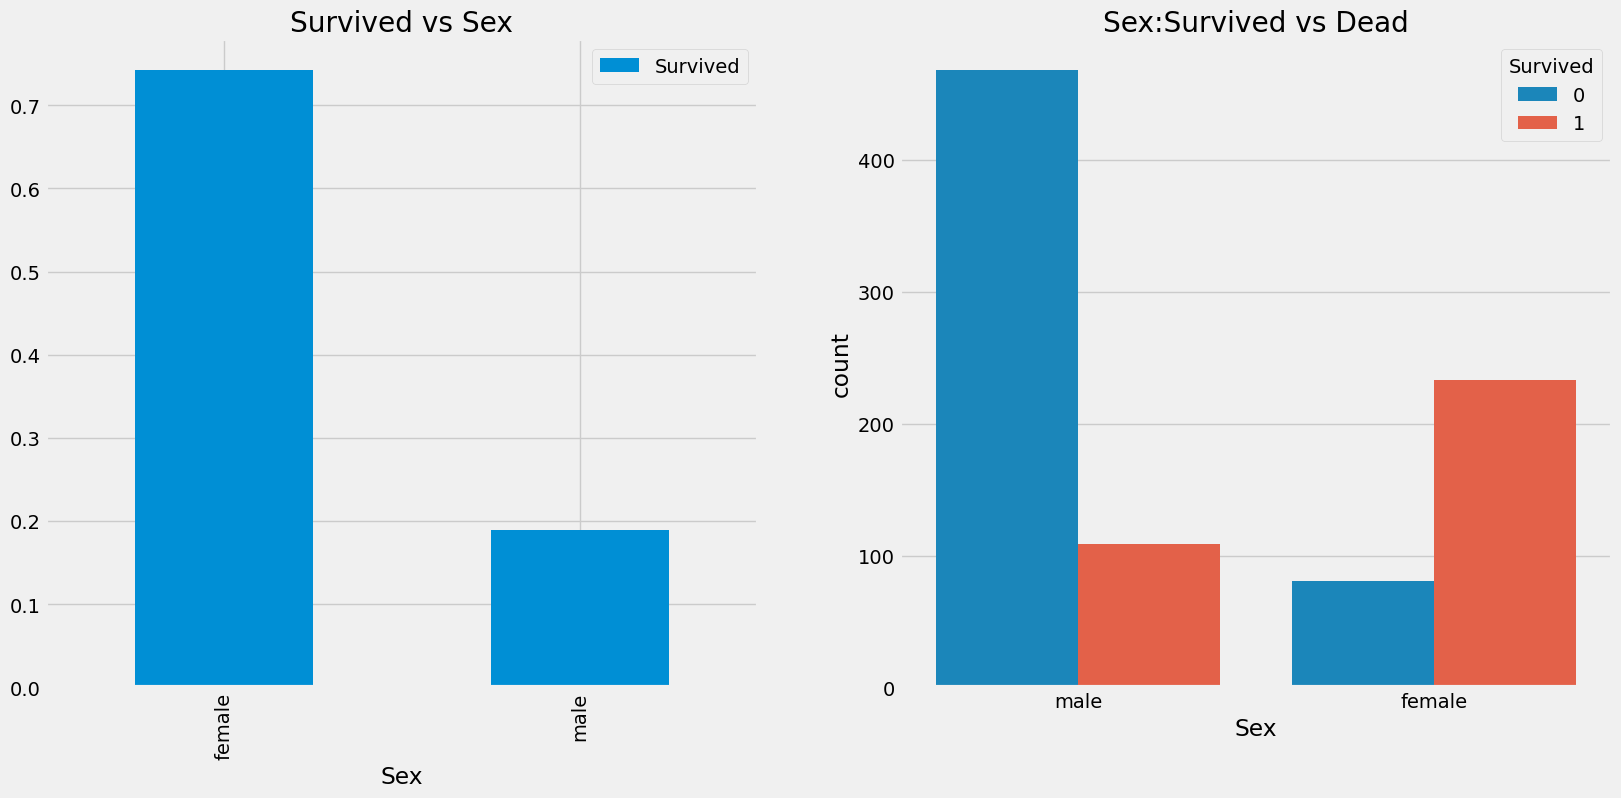

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex') # ax[0]의 제목
sns.countplot(x = 'Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead') # ax[1]의 제목
plt.show()

### Pclass

In [23]:
# Pclass --> Ordinal Feature
pd.crosstab(index = train.Pclass, columns = train.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


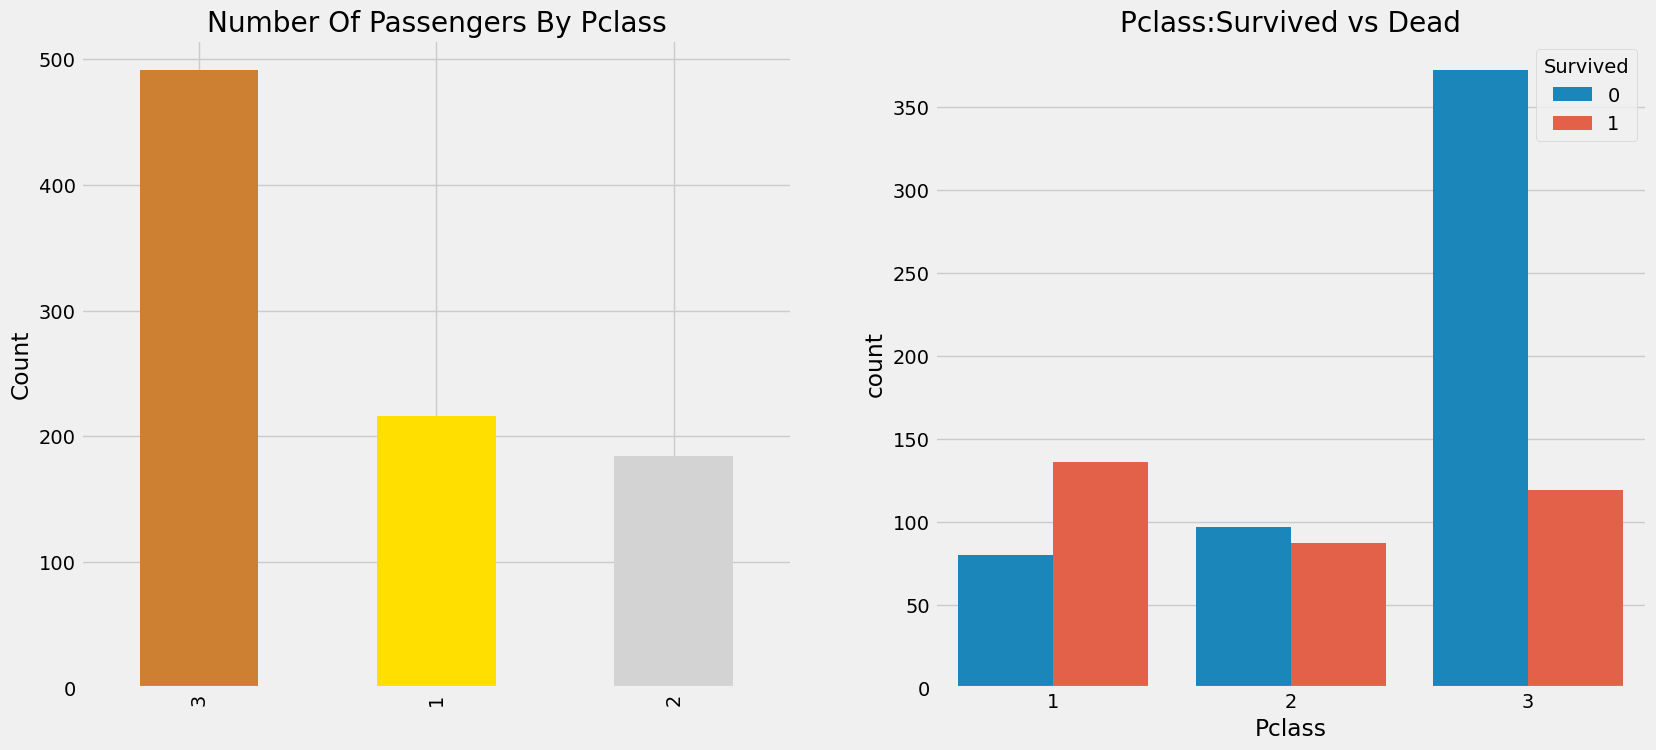

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

#### 클래스 3이 가장 많은 사망자수를 보유함

In [36]:
pd.crosstab(index = [train.Sex, train.Survived], columns = train.Pclass, margins = True).style.background_gradient(cmap = "summer_r")

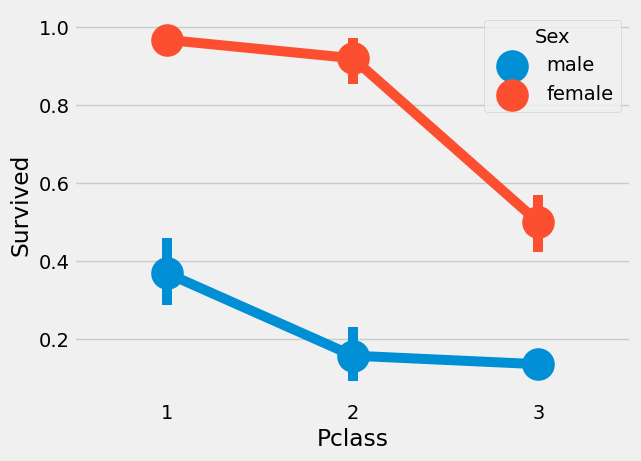

In [38]:
sns.pointplot(x= 'Pclass',y = 'Survived',hue='Sex',data=train)
plt.show()

#### pclass와 상관없이 구조 시 여성이 우선인 것이 분명해 보인다. Pclass1의 남자조차도 생존율이 매우 낮음을 확인할 수 있다.

### Age

In [40]:
# Age--> Continous Feature
# 나이의 최댓값, 최솟값, 평균 확인
print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


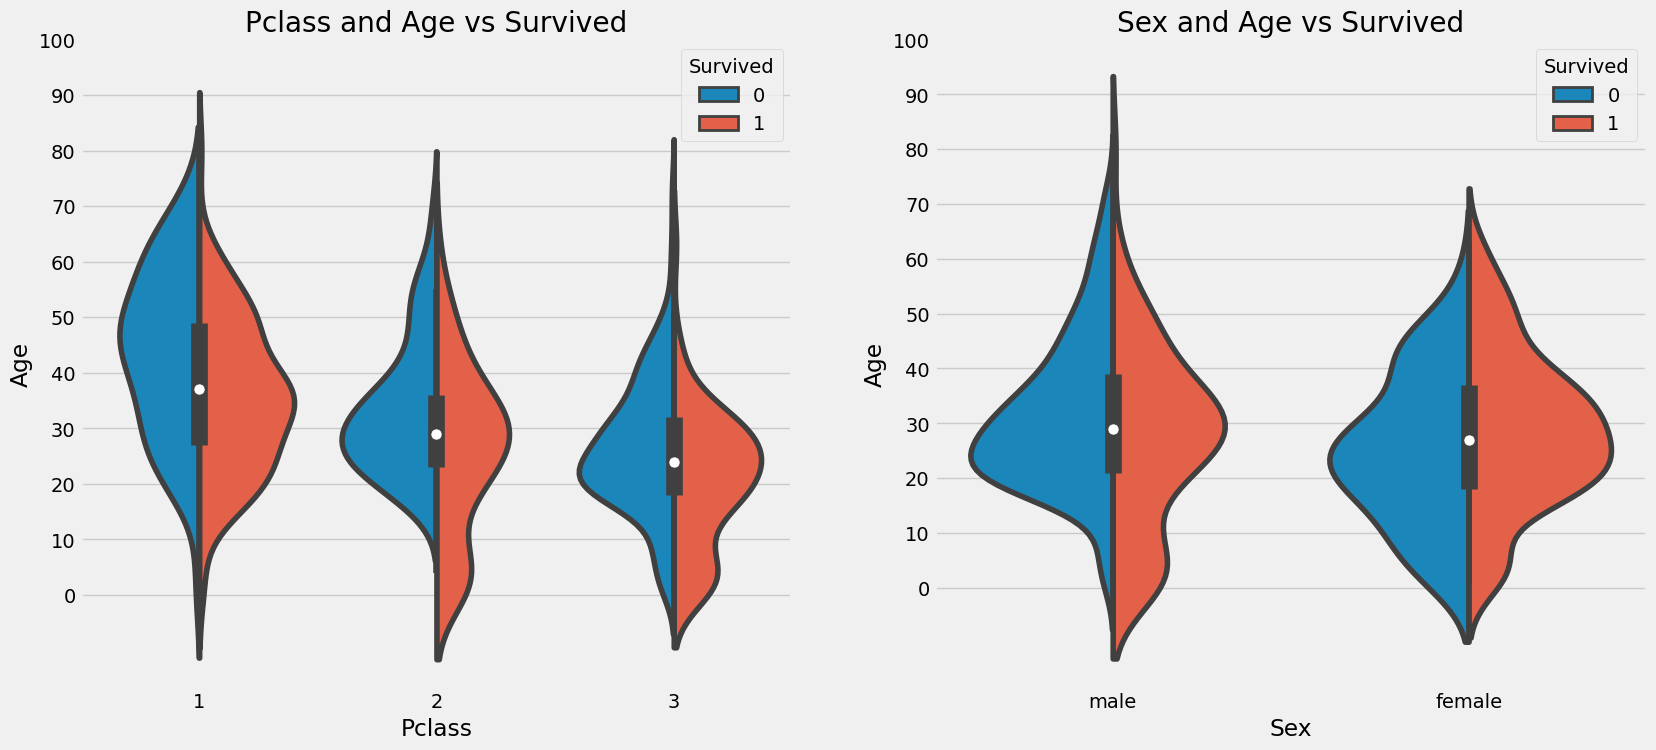

In [41]:
# violinplot
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 1) Pclass에 상관없이 아동의 수는 증가하고 10세 미만 승객의 생존율은 양호해보인다.


* 2) Pclass1의 20-50세 승객의 생존 가능성이 높고 여성이 더 생존률이 높다


* 3) 남성의 경우 나이가 들수록 생존확률이 낮아진다


#### Initial 파생변수 생성

In [44]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [45]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [47]:
train.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### 나이 결측치 채우기

In [48]:
# 위의 결과로 평균으로 채우겠습니다. 
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [52]:
# 결측치 확인 
train.Age.isnull().any()

False

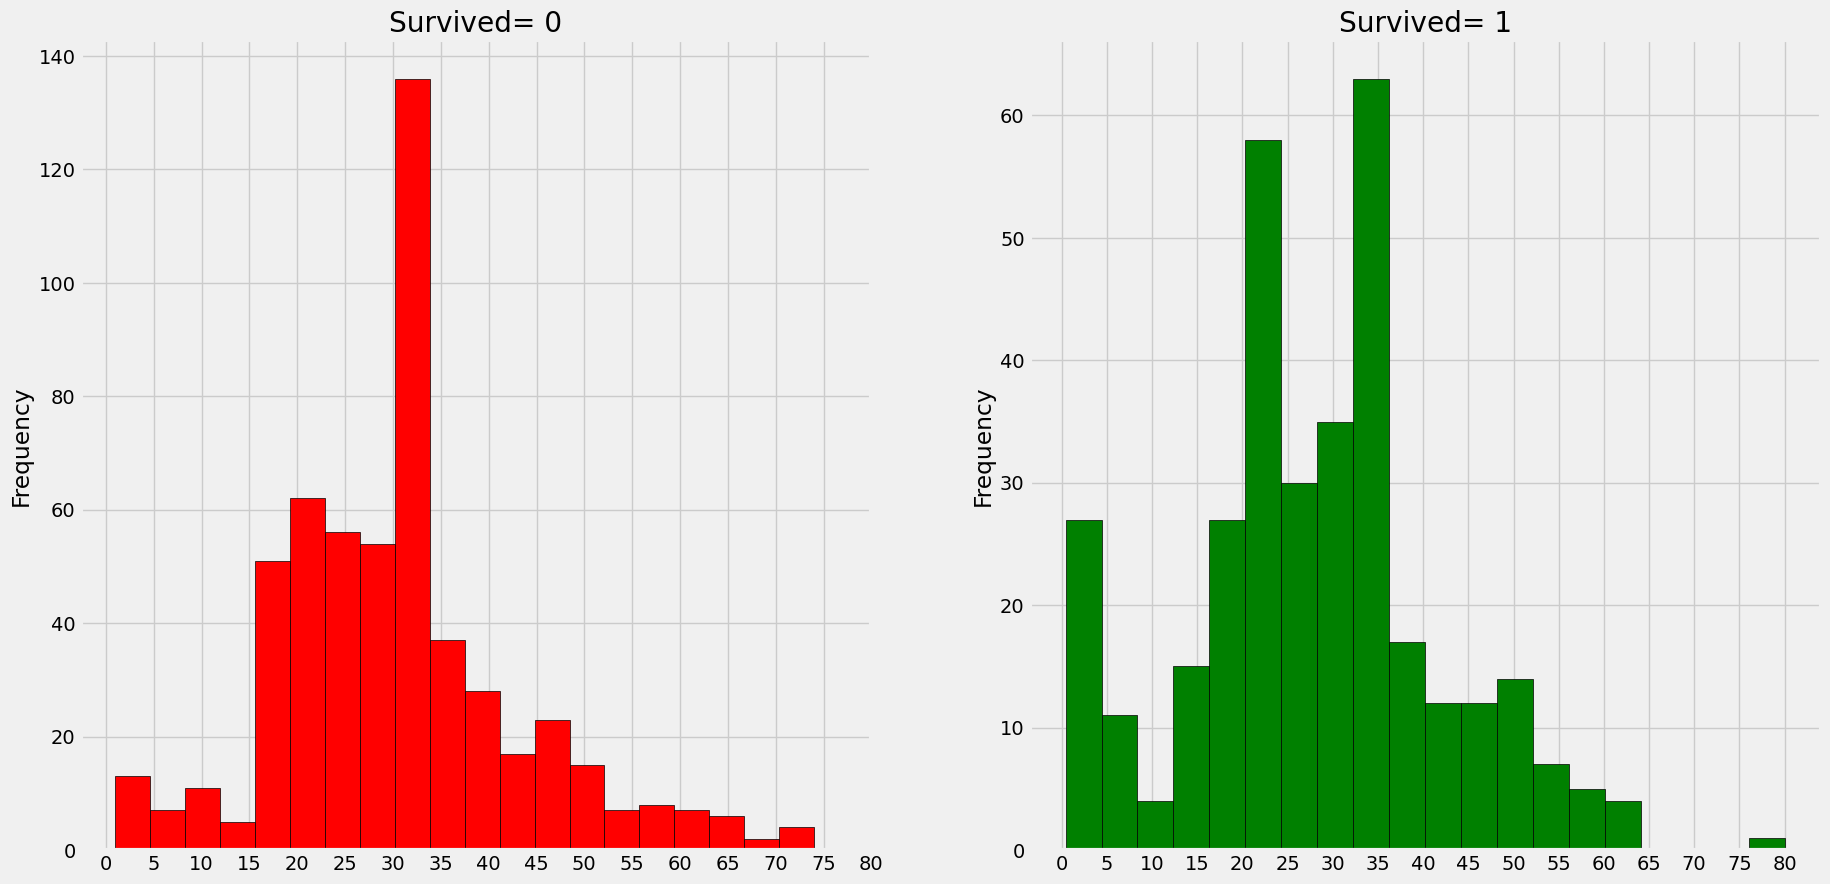

In [53]:
# 나이별 생존 분포
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

* 5세미만 아동의 생존율이 높다.


* 가장 나이가 많은 승객을 구한것은 80세이다


* 30~40대에서 가장 많이 사망하였다.

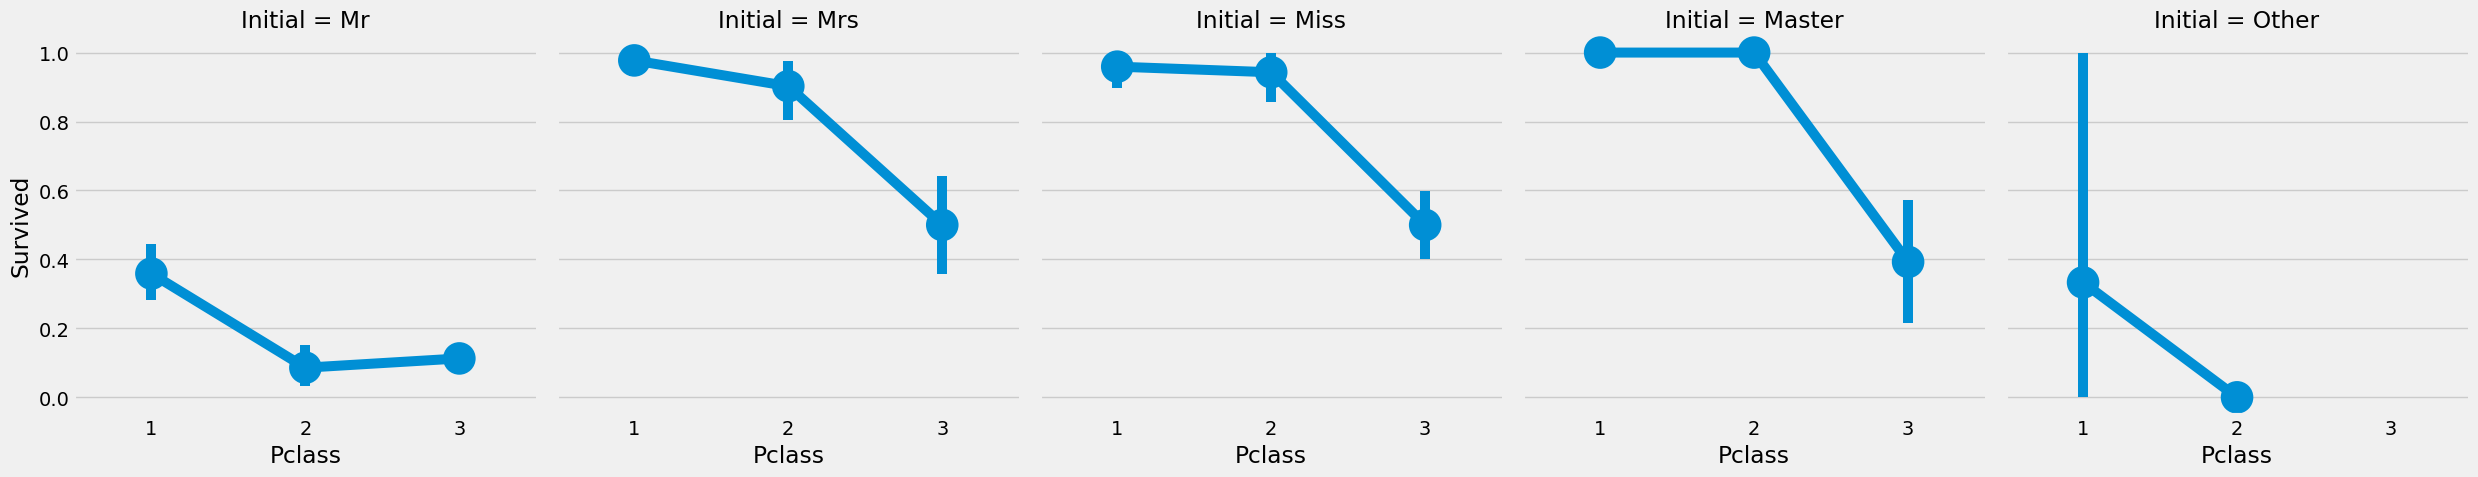

In [59]:
sns.catplot(x = 'Pclass',y = 'Survived',col='Initial',data=train, kind = "point")
plt.show()

### Embarked

In [62]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

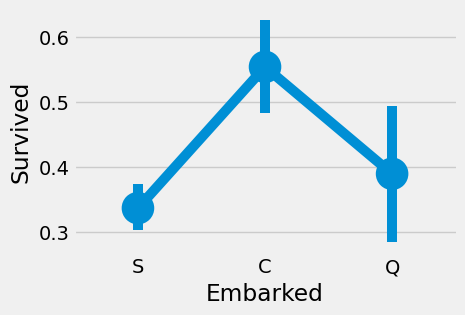

In [64]:
# Embarked별 생존

sns.catplot(data = train, x = "Embarked", y = "Survived", kind = "point")
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

#### C포트가 가장 생존 가능성이 높고(0.55) S포트가 가장 생존 가능성이 낮습니다.

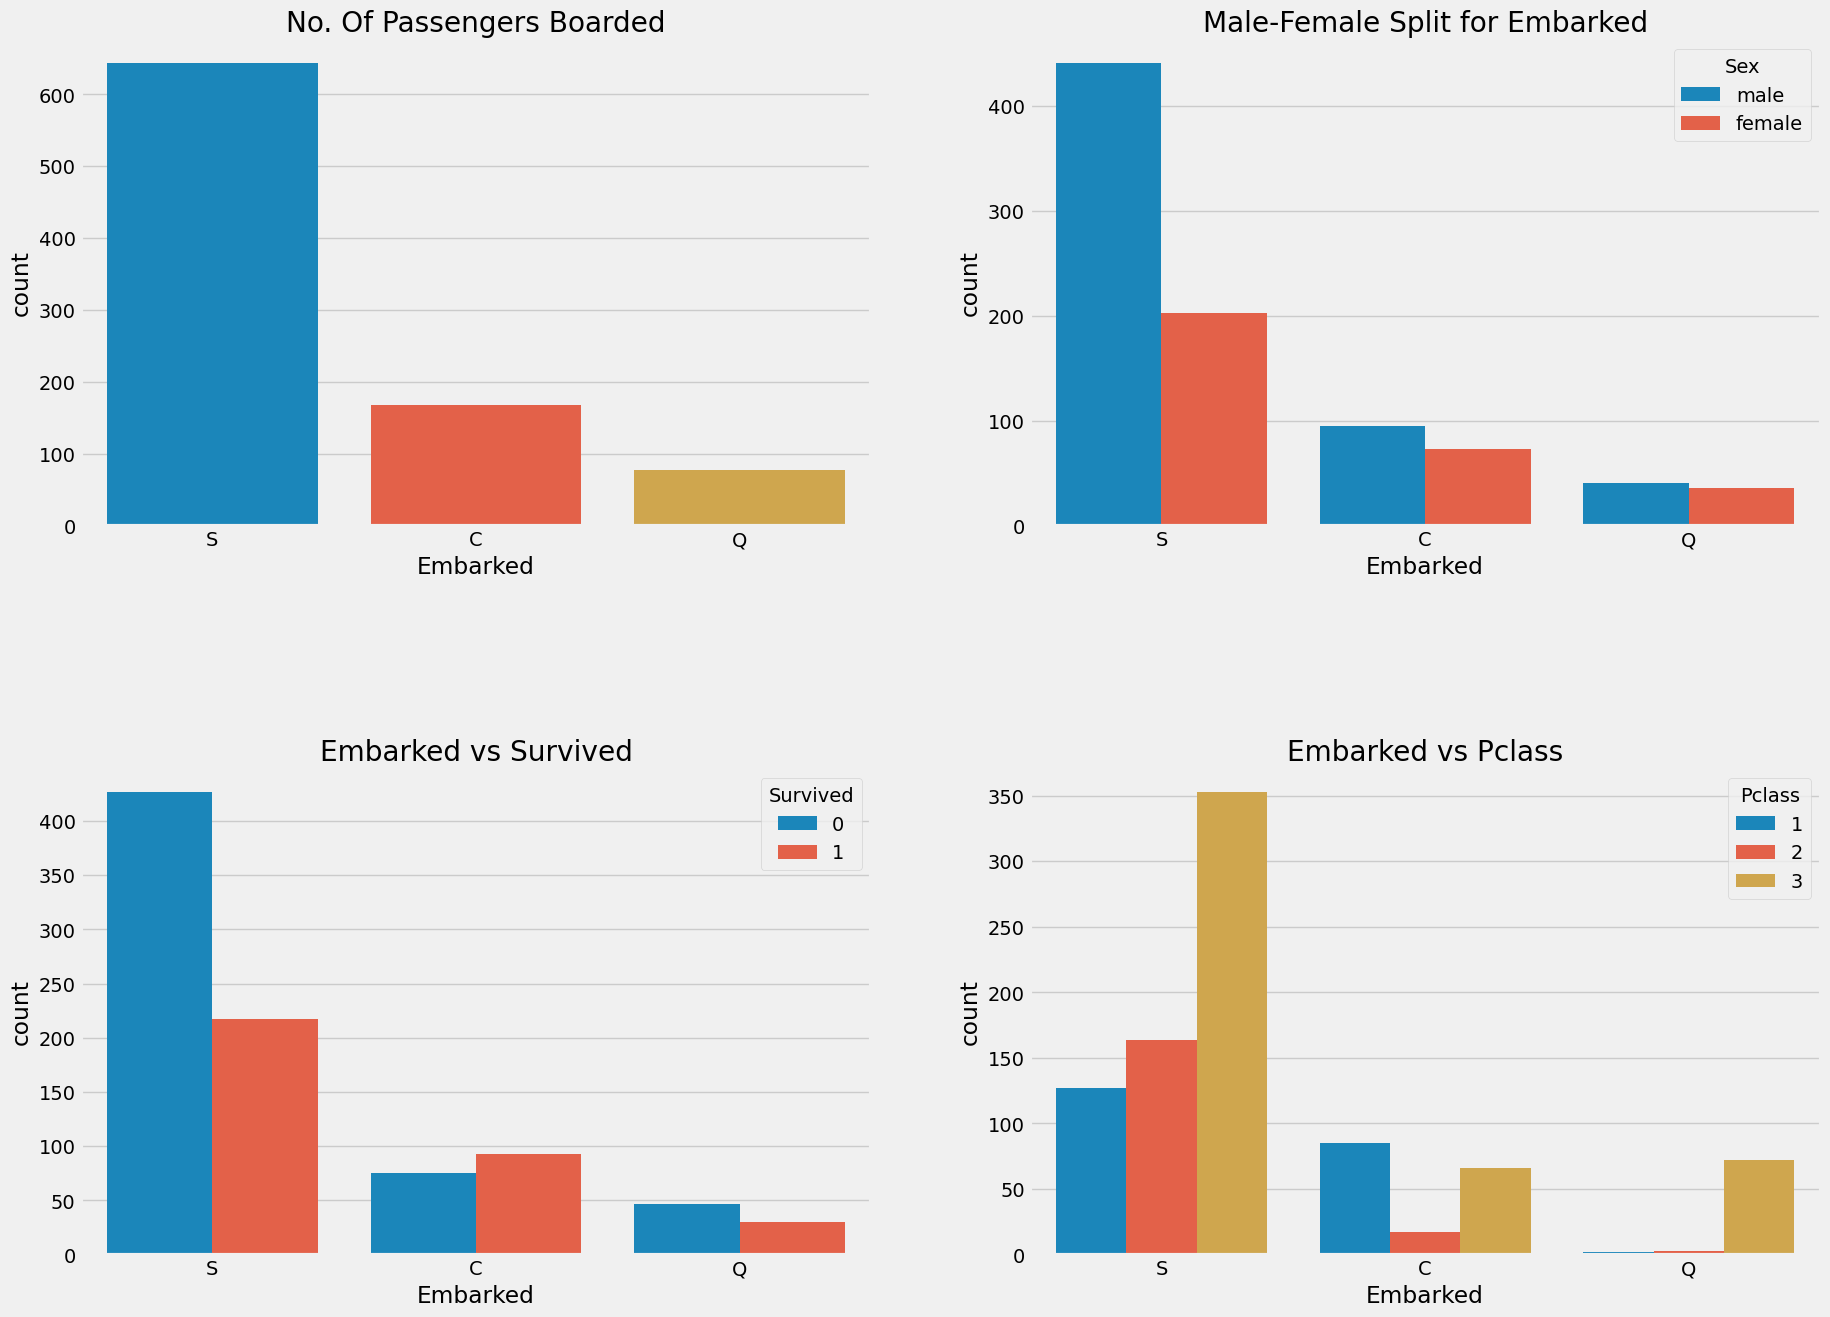

In [65]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x= 'Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x= 'Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x= 'Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x= 'Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* S에서 가장 많은 승객이 탑승, 대부분이 Pclass3에서 탑승


* C에서 온 승객들은 대부분 살았다.아마도 Pclass1 또는 Pclass2로 보인다.


* Pclass3의 승객 중 81%가 생존하지 못함


* Q의 승객은 95%가 Pclass3 출신

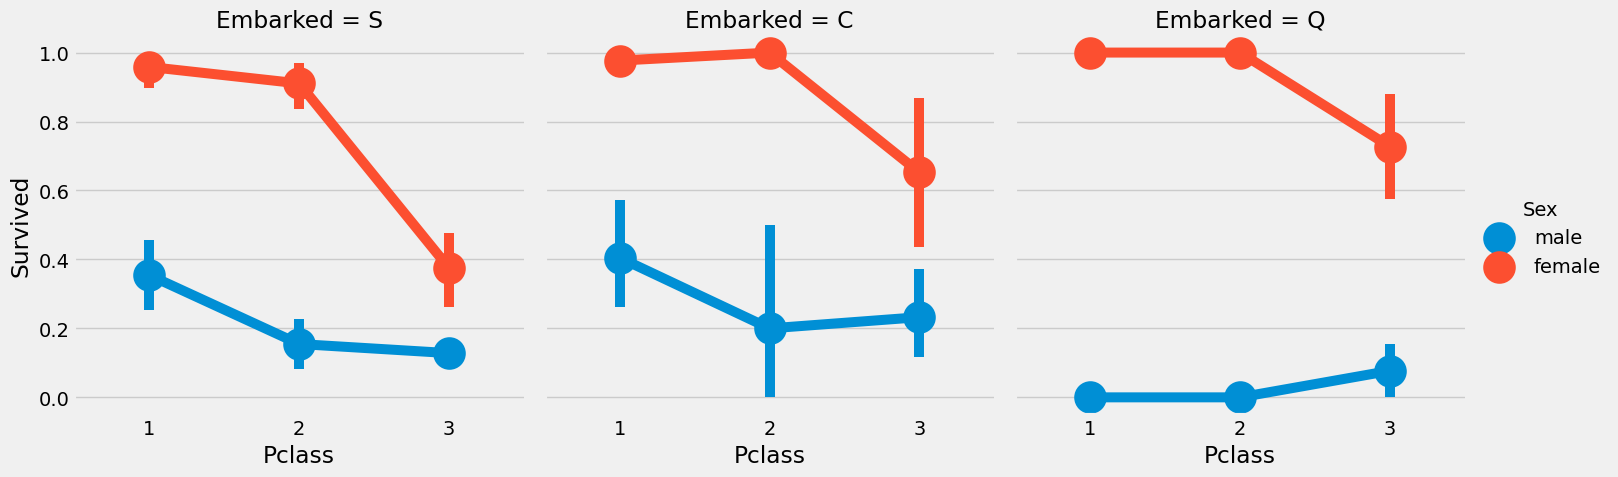

In [67]:
sns.catplot(x = 'Pclass',y = 'Survived',hue='Sex',col='Embarked',data=train, kind = "point")
plt.show()

* Pclass와 관계없이 Pclass1과 Pclass2의 여성의 생존 확률이 거의 1


* 남녀 모두의 생존율이 매우 낮은 S와 Pclass3는 운이 없는것으로 보인다.


#### Embarked 결측치 처리

In [70]:
# 대다수를 차지하는 S로 대체 
train['Embarked'].fillna('S',inplace=True)

In [72]:
train.Embarked.isnull().any()

False

### SibSip


Sibsip는 혼자인지 가족과 함께 있는지를 나타냅니다.

In [73]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


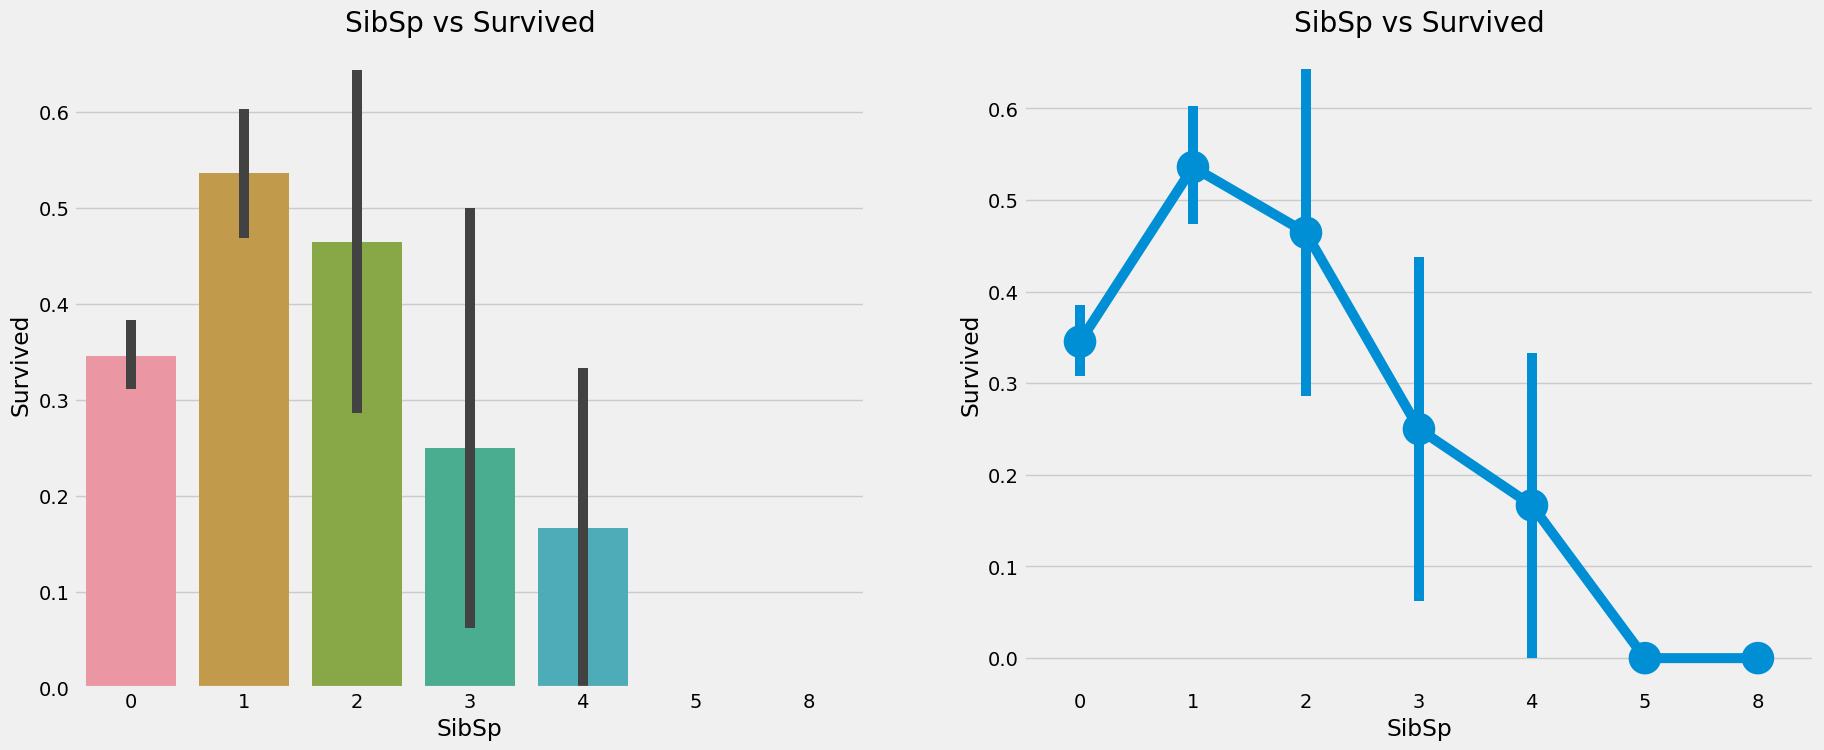

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x = 'SibSp',y = 'Survived',data=train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x = 'SibSp',y = 'Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [76]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


* 승객이 형제 없이 탑승하는 경우 생존율이 34.5% 형제수가 증가하면 그래프가 대략적으로 감소


* 이것의 의미는 배에 가족이 있다면 나 자신을 구하는게 아니라 가족을 구하려고 하는것


* 5-8인 가족의 생존율은 0%이다


* 이유는 Pclass이다. crosstab은 SibSp>3인 사람이 모두 Pclass3에 있음을 보여준다

### Parch

In [77]:
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


대가족은 Pclass 3에 있는것을 보여줌

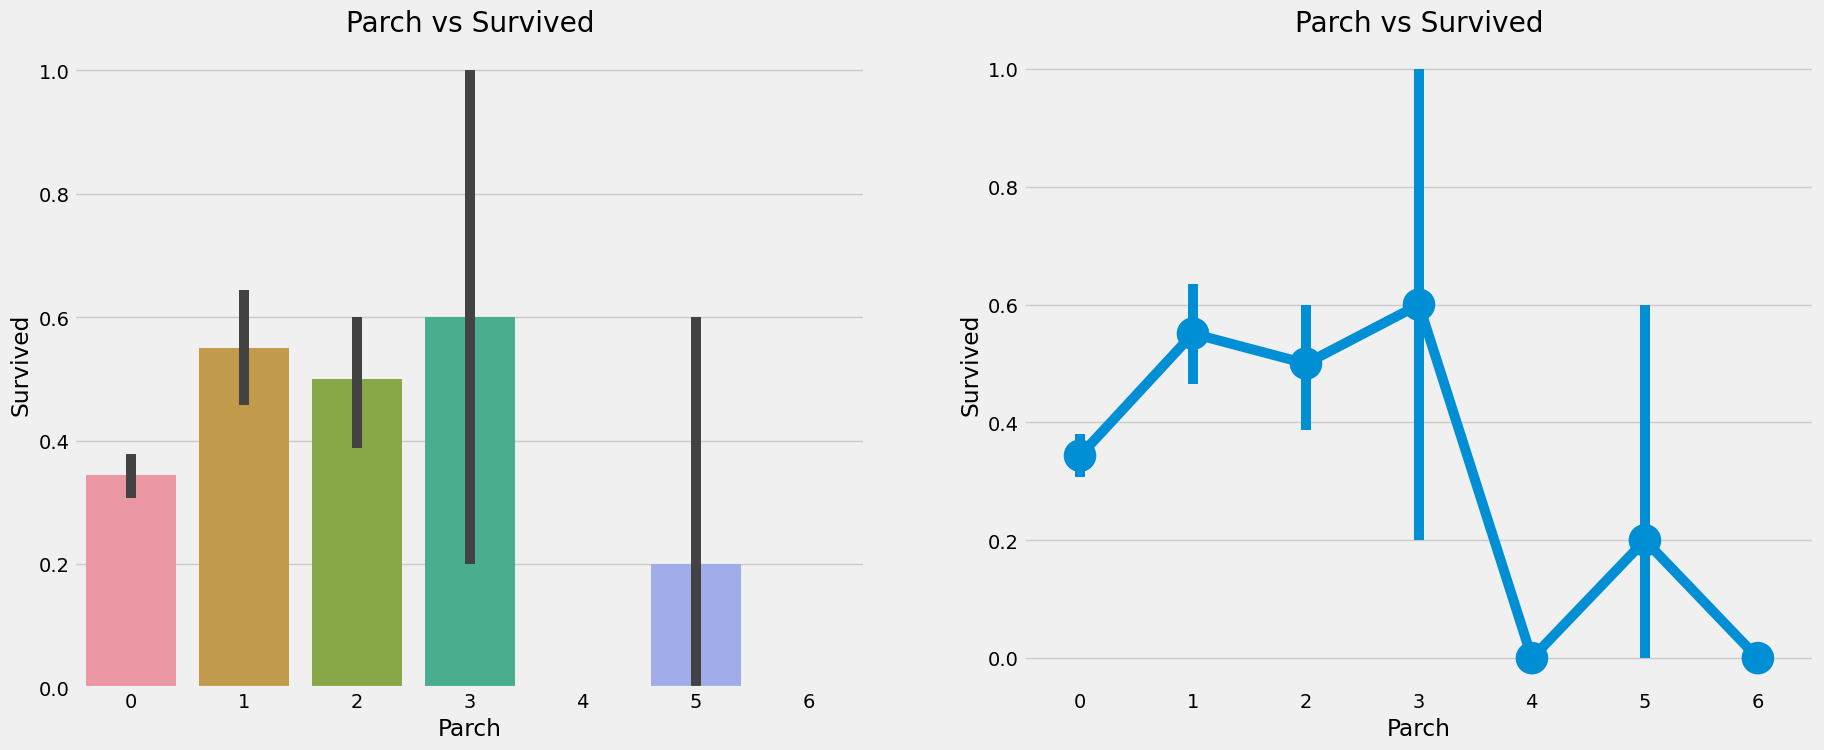

In [79]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x = 'Parch',y = 'Survived',data=train,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x = 'Parch',y = 'Survived',data=train,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

* 부모와 함께 탑승한 승객은 생존 가능성이 높다. 그러나 숫자가 올라갈수록 감소한다.

### Fare

In [81]:
# 요금의 통계값 확인
print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


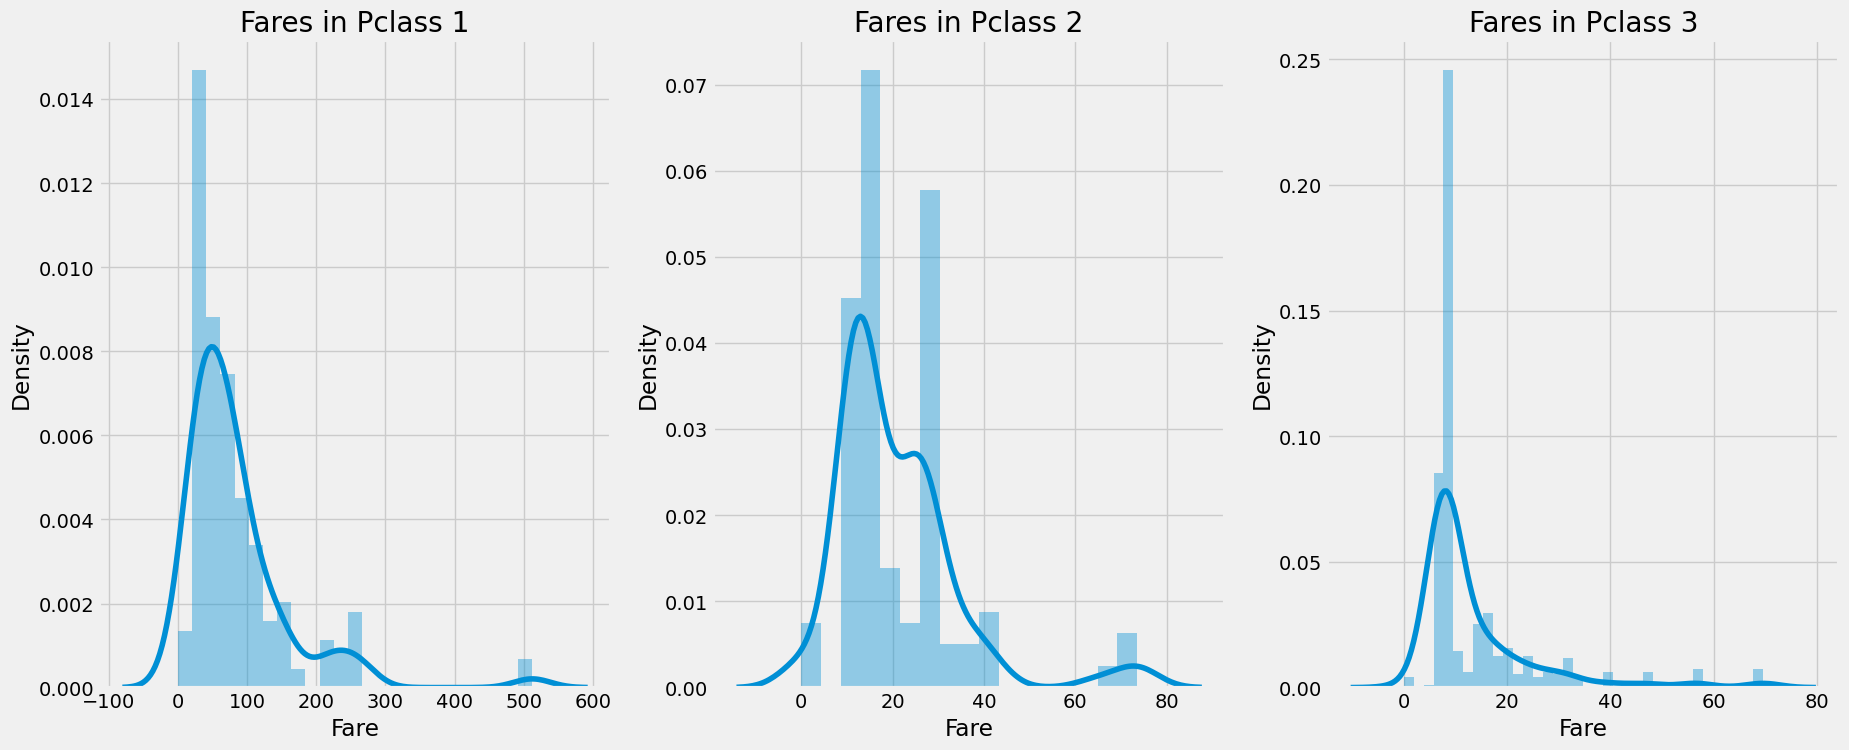

In [82]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1승객의 요금이 크게 나타남

### Feature간의 상관관계 확인

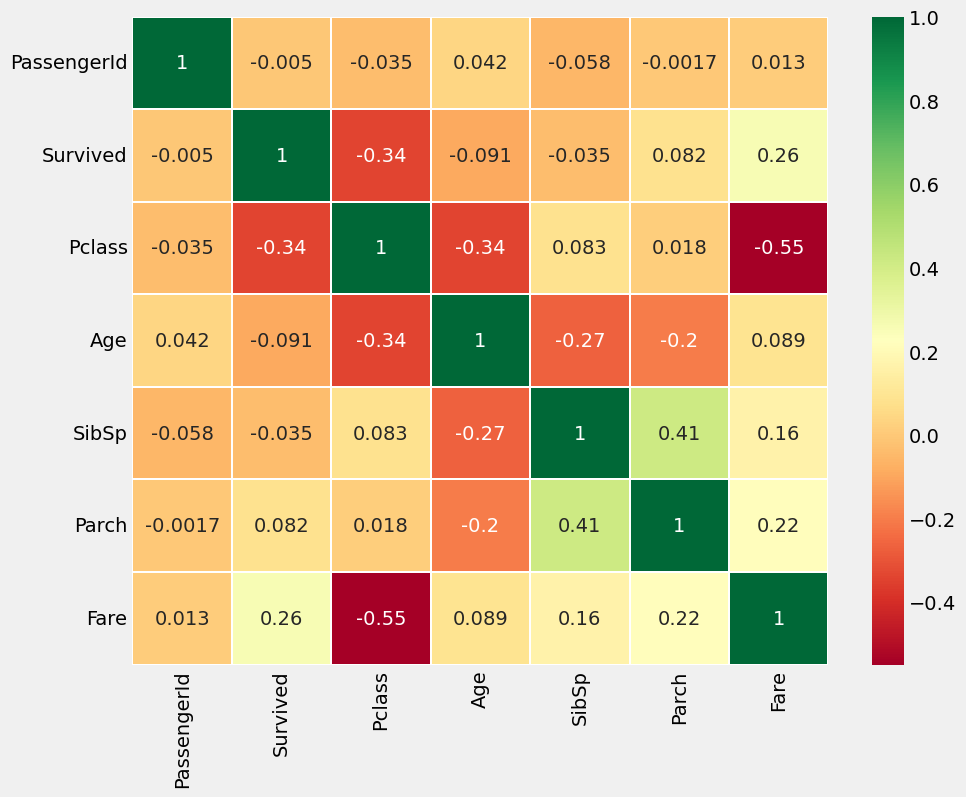

In [83]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 2. Feature Engineering 

**Feature Engineering**이란 데이터 셋트 중 모든 Feature가 사용될 필요가 없다. 제거할것은 제거하고 다른 Feature를 관찰해 새로운 Feature를 얻거나 추가

### Age_band

In [84]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [85]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


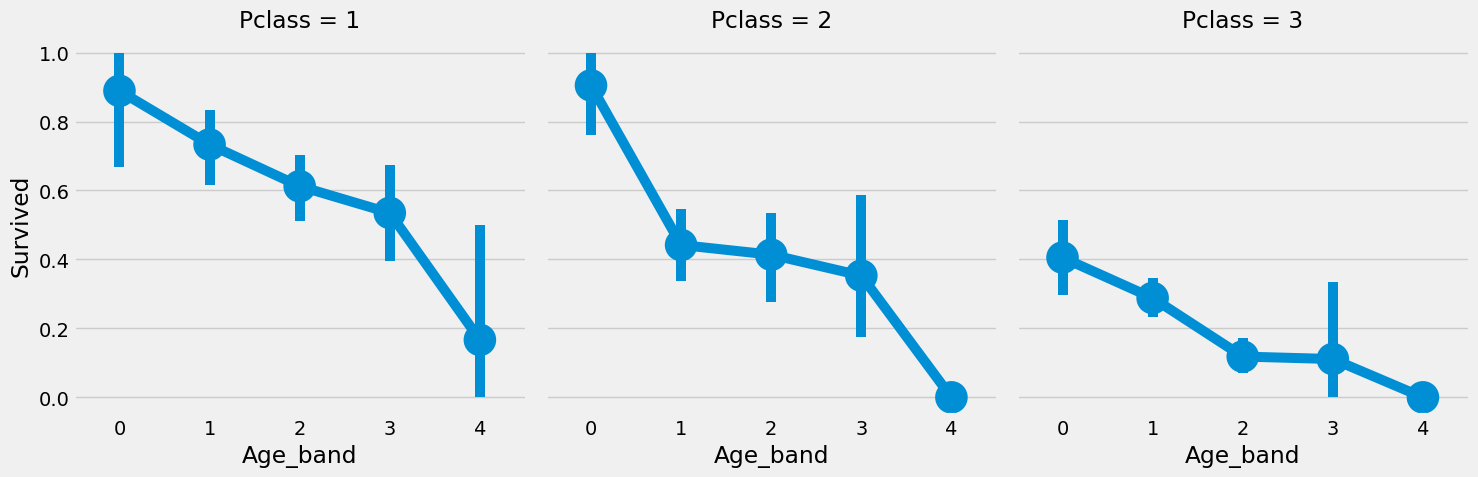

In [89]:
sns.catplot(x = 'Age_band',y = 'Survived',data=train,col='Pclass',kind = "point")
plt.show()

### Family_Size and Alone

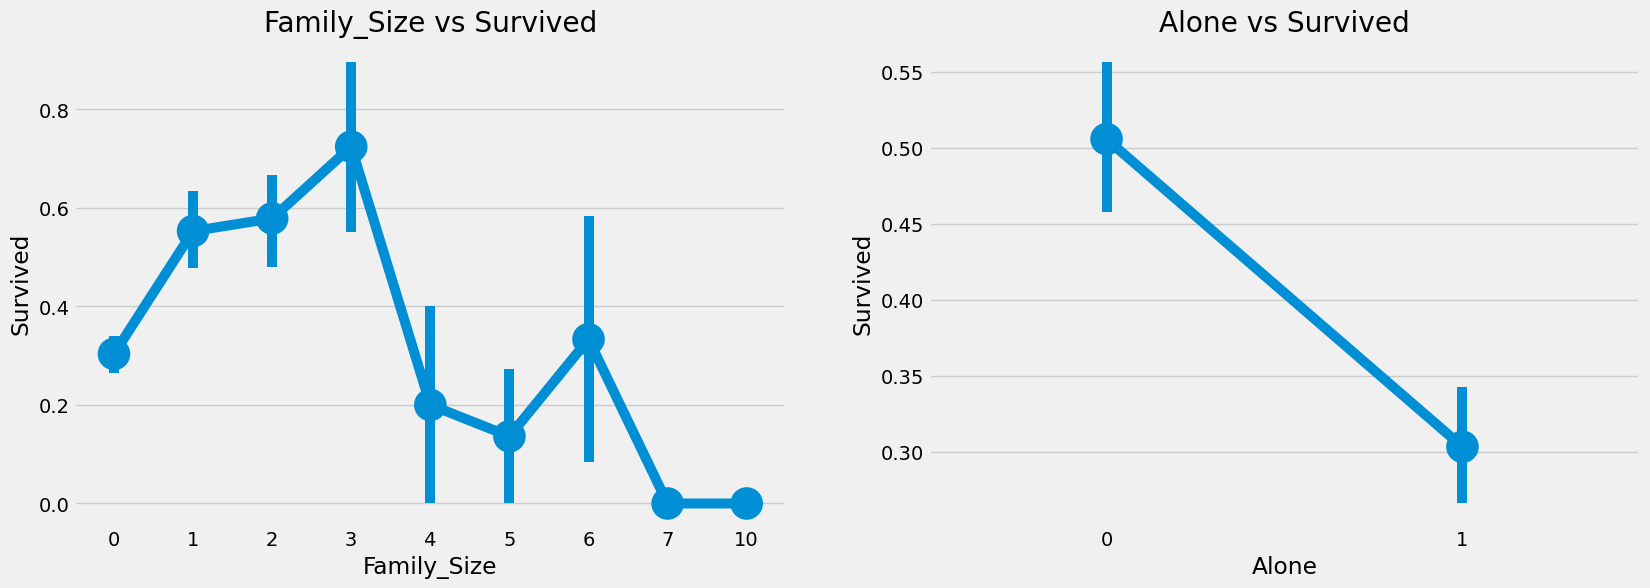

In [91]:
train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp']#family size
train['Alone']=0
train.loc[train.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x = 'Family_Size',y = 'Survived',data=train,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x = 'Alone',y = 'Survived',data=train,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Famliy_Size = 0은 승객이 혼자임을 의미, 생존 가능성은 매우 낮음

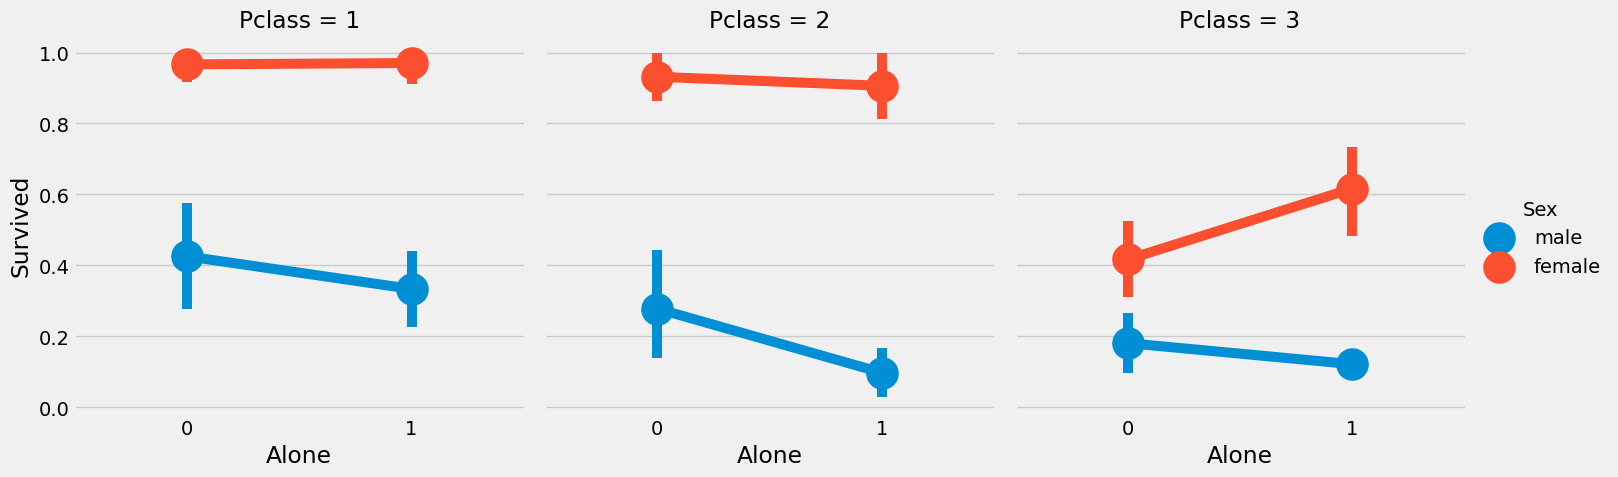

In [92]:
sns.catplot(x = 'Alone',y ='Survived',data=train,hue='Sex',col='Pclass',kind = "point")
plt.show()

Pclass3을 제외하고 성별이나 Pclass를 불문하고 혼자 있는것은 해롭다.

### Fare_Range

요금도 연속적인 값이므로 ordinal value로 변환해야 합니다.
이를 위해 pandas의 qcut를 사용합니다

* qcut는 값 범위에 균등한 간격으로 값을 정렬합니다.

In [93]:
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [97]:
# age에서 했던 것처럼 구간을 나눠주기
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3

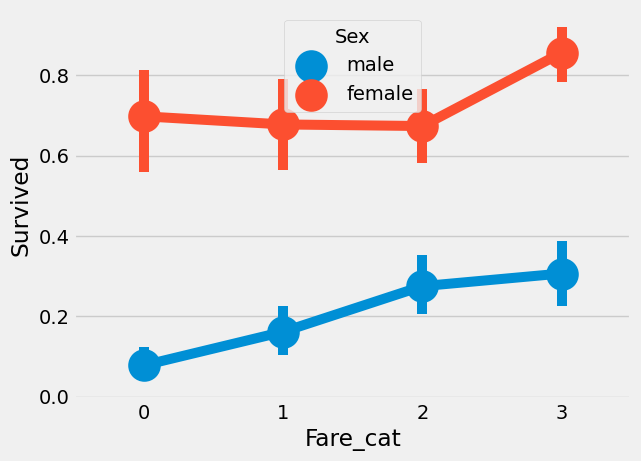

In [98]:
sns.pointplot(x = 'Fare_cat',y = 'Survived',data=train,hue='Sex')
plt.show()

Fare_cat이 증가할수록 생존 확률이 높아집니다. 이 Feature는 중요한 기능이 될 수 있습니다.

### 문자열 값을 숫자형으로 변환


* 머신러닝에서 사용하고자 한다면 문자열은 숫자형으로 반환해줘야 합니다.
* replace를 사용해 보겠습니다.


In [99]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### 불필요한 변수 삭제

1) 이름: 범주형 값으로 변환할 수 없다.


2) 나이: Age_band라는 새로운 파생변수를 생성하였음


3) 티켓: 분류할 수 없는 임의의 문자열이다.


4) 요금: Fare_cat이라는 파생변수를 생성하였음 


5) Cabin: 많은 결측치와 승객이 여러개의 객실을 가지고 있다.


6) Fare_Range: Fare_cat이라는 파생변수가 있음


7) Passengerid: 분류불가능

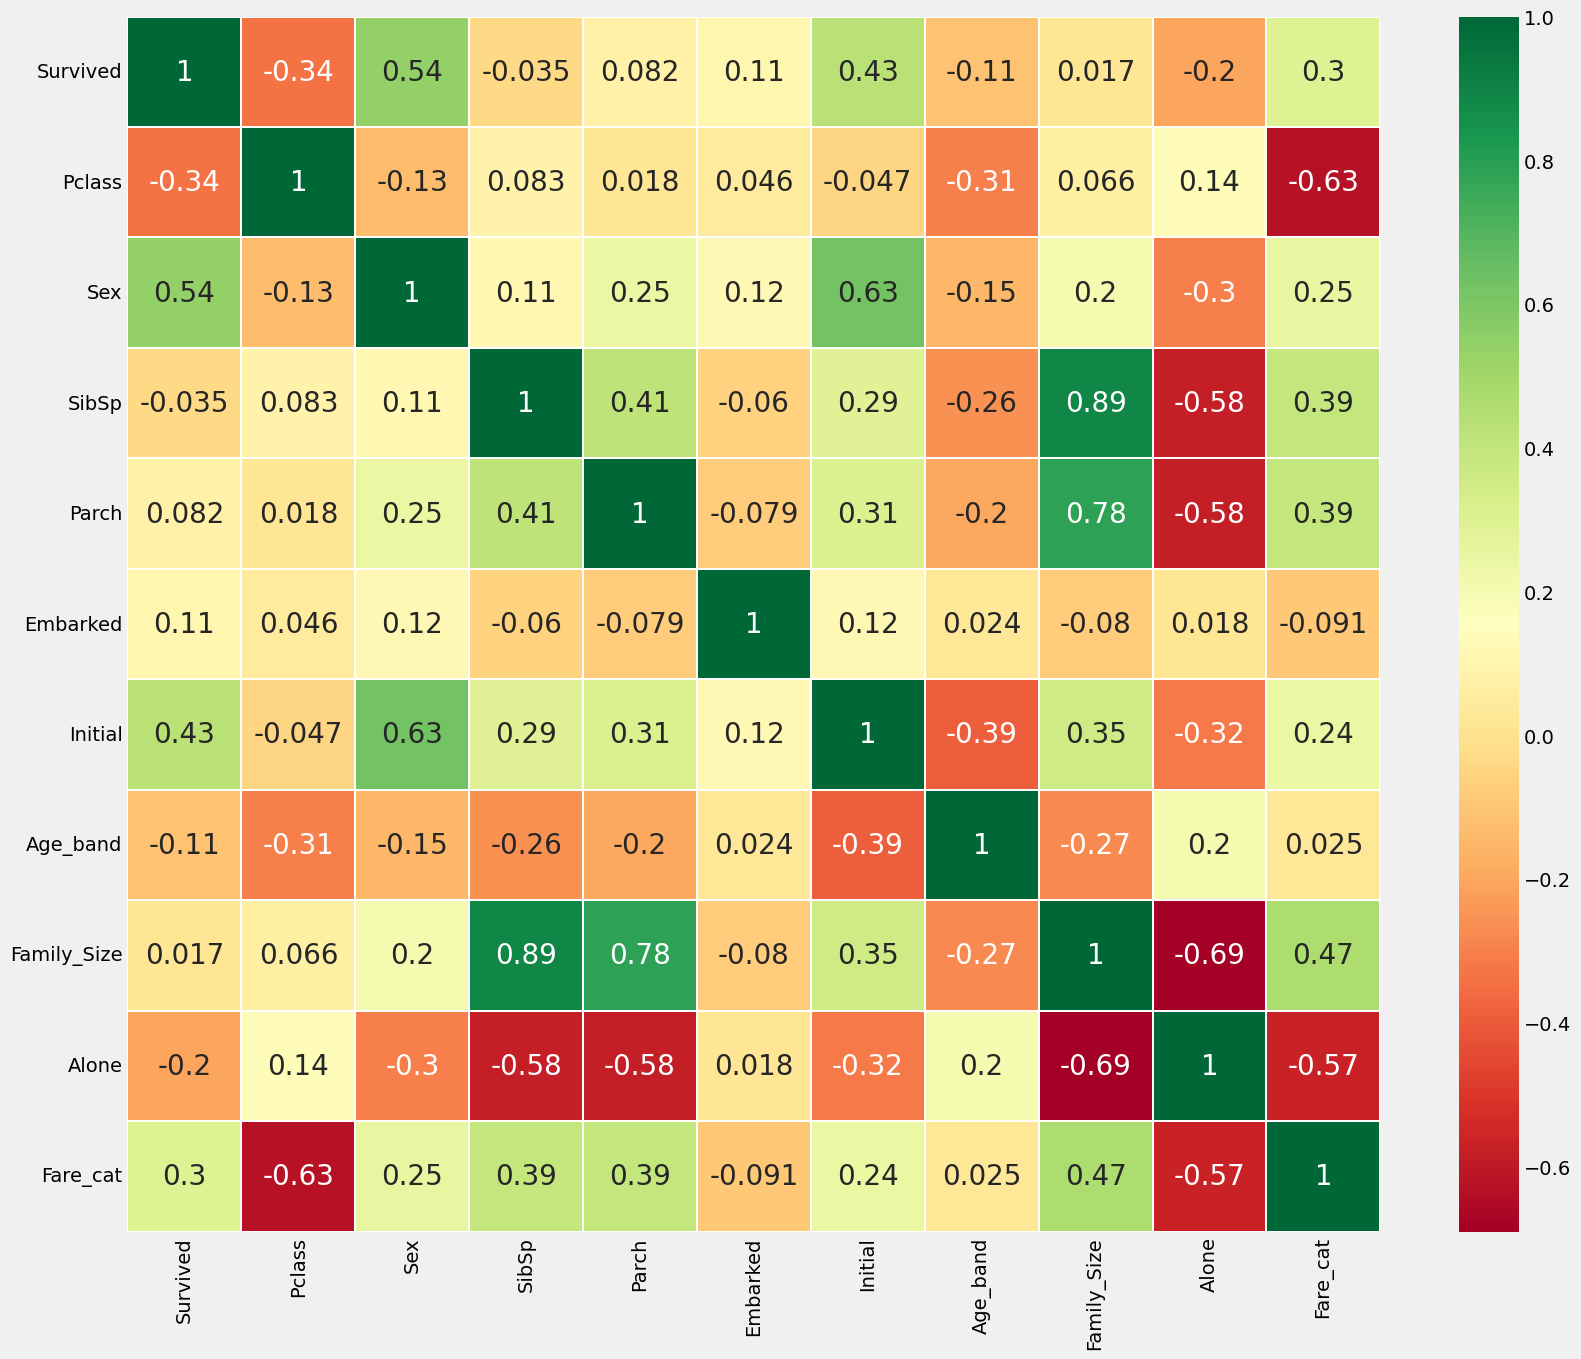

In [100]:
train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 3) Predictive Modeling

EDA를 통해 몇가지 인사이트를 얻었습니다. 그러나 그것만으로는 승객이 생존할지 예측이 불가능 합니다. 


분류 알고리즘을 사용하여 승객이 생존할지 여부를 예측하겠습니다.

In [101]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [102]:
# test와 train으로 나누기 

train,test=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train[train.columns[1:]]
Y=train['Survived']

In [103]:
train_X.shape

(623, 10)

In [105]:
train_Y.shape

(623, 1)

In [107]:
test_X.shape

(268, 10)

In [108]:
test_Y.shape

(268, 1)

In [110]:
# DecisionTree
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


In [111]:
# KNN
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction2,test_Y))

The accuracy of the KNN is 0.8134328358208955


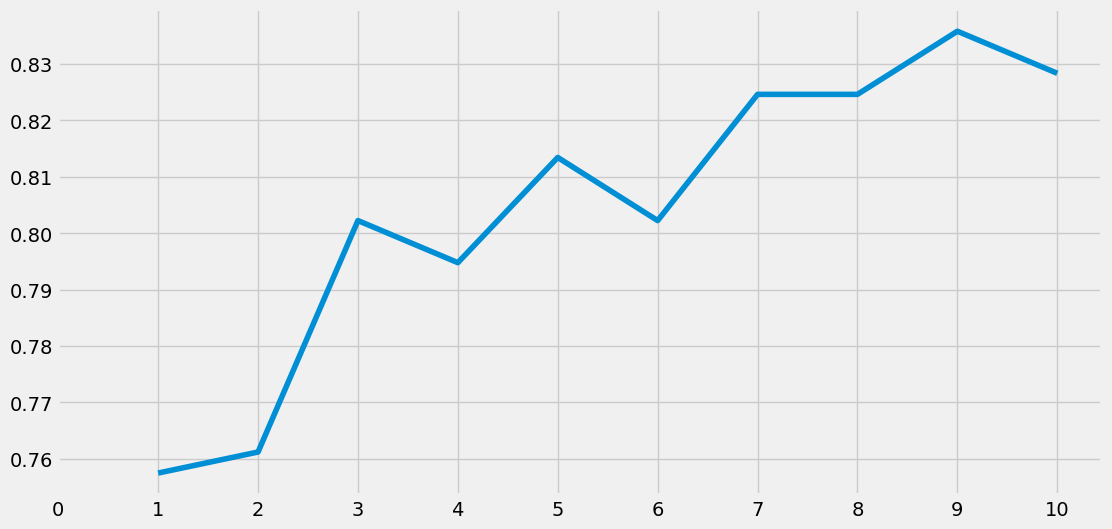

Accuracies for different values of n are: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as  0.835820895522388


In [112]:
# KNN n_neighors 조절
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

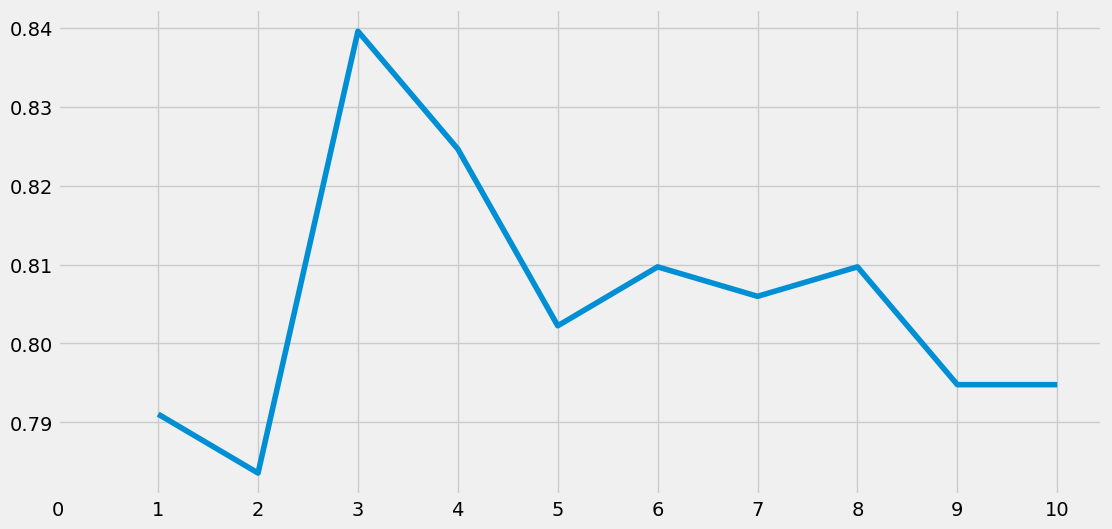

Accuracies for different values of n are: [0.79104478 0.78358209 0.83955224 0.82462687 0.80223881 0.80970149
 0.80597015 0.80970149 0.79477612 0.79477612] with the max value as  0.8395522388059702


In [113]:
# 의사결정나무 max_depth 조절
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=DecisionTreeClassifier(max_depth=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [114]:
# RandomForest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


In [122]:
# SVM
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction4 =model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction4 ,test_Y))

Accuracy for rbf SVM is  0.835820895522388


정확도가 높다고 분류기의 견고성을 결정하는 유일한 요소가 아니다.
테스트 세트가 변경되면 정확도도 증가하거나 감소할 수 있다. 이것을 **모델분산** 이라고 한다.


이를 극복하고 일반화된 모델을 얻기 위해 Cross Validation을 사용한다.

### Cross Validation

In [118]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=42,shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784818,0.061275
Radial Svm,0.823400,0.047126
Logistic Regression,0.799232,0.068011
KNN,0.797747,0.052138
Decision Tree,0.804199,0.019654
Naive Bayes,0.796032,0.075226
Random Forest,0.802586,0.035782


<AxesSubplot:>

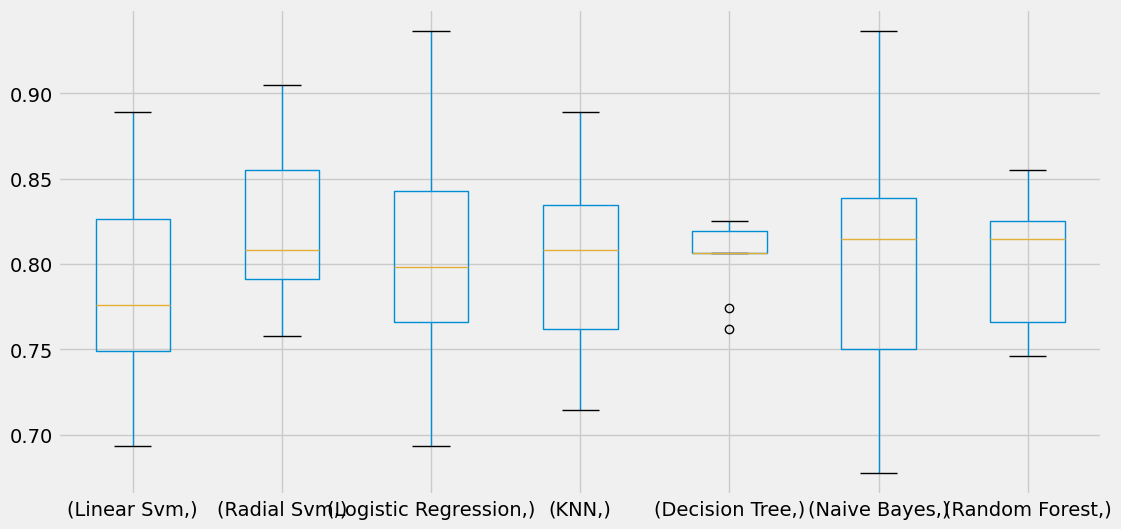

In [119]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

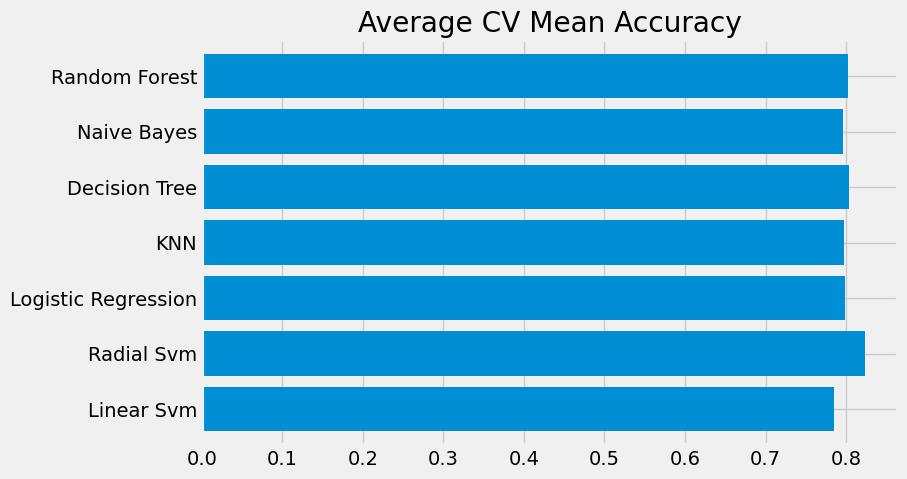

In [120]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 불균형으로 인해 때때로 오해의 소지가 있다.

혼동 행렬을 통해 요약된 결과를 얻을 수 있다.

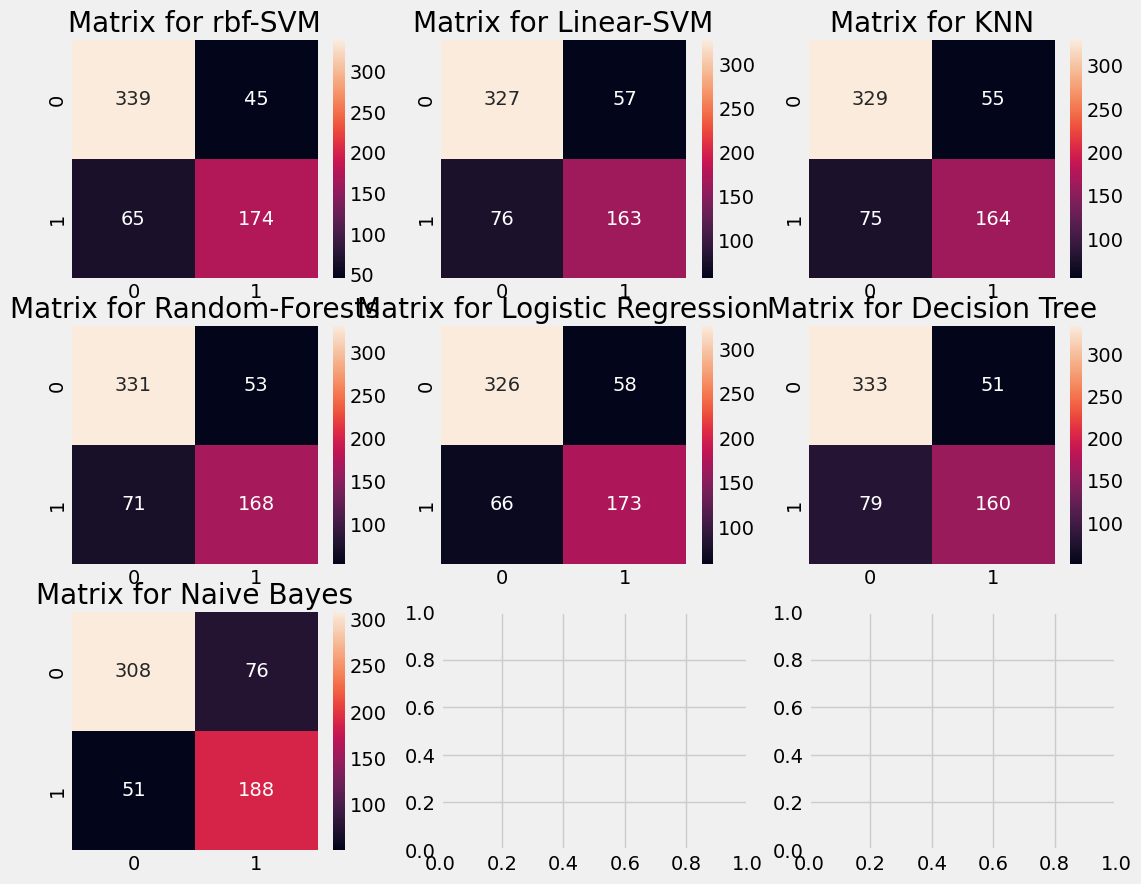

In [121]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

# Hyper-Parameters Tuning

In [123]:
# SVM
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8250451612903227
SVC(C=0.8, gamma=0.1)


In [124]:
# Random Forests
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8153806451612905
RandomForestClassifier(n_estimators=900, random_state=0)


* SVM의 최고점수는 C = 0.8, gamma = 0.1일때 0.825입니다.


* RandomForest의 최고점수는 n_estimators = 900일때 약 0.815입니다.